# Linear Models
### `! git clone https://github.com/ds3001f25/linear_models.git`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Previously
- $k$-NN and $k$-MC illustrate the distinctions between regression and classification, and supervised and unsupervised learning
- In both cases, the number of parameters available for fitting the model is really limited --- just $k$ --- and they offer almost no explanation of their results


## Linear Models
- Today we introduce *linear model*, which optimally weight the explanatory variables in order to predict the outcome variable
- These are extremely powerful and easily interpreted tools
- There are a lot of ideas and math in these notes: What's important is that you get exposed to ideas, and get the essential ideas of regression


## Example: Hedonic Pricing
- Let's start with a simple example: How do the features of a product, like a car or a house, determine its value?
- This is typically called **hedonic pricing**, where the value of the product or service is assumed to be generated by the combination of features and amenities it provides
- For example, you might know the car's features: horsepower, color, leather seats, whether it's electric electric, mileage, seat warmers, moon-roof, and so on, including more intangible but relevant covariates like the brand or whether the car was previously owned by a smoker
- How do you model this?

## Example: Hedonic Pricing
- In a typical hedonic pricing exercise, you put weights on each feature of the car:
\begin{alignat*}{2}
\text{price} &=& \underbrace{b_0}_{\text{Constant/bias/intercept}} + b_{\text{mileage}} \times \text{mileage} + b_{\text{horsepwr}} \times \text{horsepwr}\\
&& + b_{\text{electric}} \times \text{electric} + b_{\text{sunroof}} \times \text{sunroof} + ... + b_{\text{used}} \times \text{used} \\
&& + b_{\text{audi}} \times \text{audi} + b_{\text{honda}} \times \text{honda} + ... + b_{\text{toyota}} \times \text{toyota}
\end{alignat*}

- Each weight $b_k$ allows the variable $x_k$ to have some impact on the predicted price; we'll want to find the best weights we can, which is a complicated question
- Because the weights $b_k$ enter the model in a multiplicative way, this is a **linear model**
- If this is going to work well, we need to think about interesting features to add, why they are useful, and how to optimally transform/engineer them
- Does the price of a BMW go up more when you add a sunroof than when you add a sunroof to a Toyota?

## Linear Models
- In a linear model, our target/response/dependent variable $y$ is predicted by a vector of features $(x_1, ..., x_L)$, and typically a constant/intercept/bias term $b_0$:
$$
y = b_0 + b_1 x_1 + b_2 x_2 + ... + b_L x_L = b_0 + \sum_{\ell = 1}^L b_\ell x_\ell
$$
- The choice of variables to include is a hyperparameter for us, like $k$ in a $k$-NN model
- The intercept $b_0$ has some fussy details we'll have to discuss
- We typically think of the weights/coefficients $[b_0, b_1, ..., b_L]$ and the variables $[1, x_1, ..., x_L]$ explicitly as ordered lists of numbers, called **vectors**:
$$
b = \left[ \begin{array}{c} b_0 \\ b_1 \\ \vdots \\ b_L \end{array} \right], \quad x = \left[ \begin{array}{c} 1 \\ x_1 \\ \vdots \\ x_L \end{array} \right]
$$

# Some Vector Space Notation

## Vector Multiplication
- Suppose we have two vectors $x=(x_1,...x_L)$ and $b=(b_1,...,b_L)$ of equal length, $L$
- The *dot product* or *inner product* is
$$
x_1 b_1 + ... + x_L b_L
$$

So we multiply the first two entries together, the second two together, and so on, then sum all the terms.
- Common notation for this is:
$$
x \cdot b = x^\top b = x'b = \langle x, b \rangle = \sum_{\ell=1}^L x_\ell b_\ell
$$

## Dot Product Example
- Suppose `y = (3,-5,7)` and `x = (2,4,-6)`. How do we compute the dot product in Python?

In [2]:


y = (3,-5,7)
x = (2,4,-6)

print( x[0]*y[0] + x[1]*y[1] + x[2]*y[2] )

print( np.inner(x,y), '\n') # Using Numpy

-56
-56 



## Angle and Correlation [math]
- What "is" this thing? It is related to the angle between $x$ and $b$:
$$
\cos(\theta_{xb}) = \dfrac{x \cdot b}{\sqrt{x \cdot x} \  \sqrt{b \cdot b}}
$$
The dot product is the mathematical object that creates *angles* between objects in a space.
- Recall, $\cos( 90^\circ) = \cos(\pi/2) = 0$, so if the dot product between two vectors is zero, they are at a "right angle" to one another, or **orthogonal**


- Where does this show up in statistics? Define $z_x = x - \bar{x}$ and $z_y = y - \bar{y}$. Then the correlation is

\begin{alignat*}{2}
\cos(\theta_{z_x, z_y}) = \text{cor}(x,y)
\end{alignat*}


\begin{alignat*}{2}
\cos(\theta_{z_x, z_y}) &=& \dfrac{z_x \cdot z_y}{\sqrt{z_x \cdot z_x} \  \sqrt{z_y \cdot z_y}} \\
&=& \dfrac{\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^N (y_i - \bar{y})^2} }\\
&=& \dfrac{\dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{ \dfrac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2}\sqrt{\dfrac{1}{N}\sum_{i=1}^N (y_i - \bar{y})^2} }\\
&=& \dfrac{ \text{cov}(x,y)}{\sigma_x \sigma_y}\\
&=& \text{cor}(x,y)
\end{alignat*}


- Great, $\cos(\theta_{x-\bar{x}, y-\bar{y}}) = \text{cor}(x,y)$, but what does this mean?
- The sample correlation between two variables is really the angle between them.
- If $\text{cor}(x,y)=0$ it means the two variables are **independent** or **orthogonal** to one another: At right angles.
- When vectors have a high correlation or covariance, we will often want to remove the mutual/redundant information they carry, and orthogonalize them (e.g. PCA, Chebyshev Regression) 

## Matrix Multiplication
- If you stack $N$ rows of $x$ vectors (observations), you get a dataframe. You can multiply them all your observations times the weights at once as follows:
$$
X \cdot b =  \left[\begin{array}{cccc} x_{11} & x_{12} & \dots & x_{1L} \\ x_{21} & x_{22} & \dots & x_{2L}  \\ \vdots & \vdots & \ddots & \vdots \\ x_{N1} & x_{N2} & \dots & x_{NL} \end{array} \right] \cdot \left( \begin{array}{c} b_1 \\ b_2 \\ \vdots \\ b_L \end{array}\right) = \left( \begin{array}{c} x_1 \cdot b \\ x_2 \cdot b \\ \vdots \\ x_N \cdot b\end{array} \right) = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_N \end{array} \right)
$$
- This is part of the motivation for "clean"/"tidy" data: We do calculations directly on the data frame. Having `NA`'s or ambiguity about what a row or column is causes calculations to break down.


## Matrix Multiplication Example
- Suppose
$$ X = \left[ \begin{array}{ccc} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{array} \right] $$
and
$$ b = \left( \begin{array}{c} 2 \\ 4 \\ 6 \end{array} \right)$$
- What is $X \cdot b$?

In [3]:
X = np.matrix('1,2,3;4,5,6;7,8,9') # Making a matrix in numpy
print('Matrix X:')
print(X)
b = np.array([2,4,6]) # Making a vector in numpy
print('Vector b:')
print(b)
y = np.matmul(X,b) # Matrix multiplication in numpy
print('X dot b:')
print(y)
y = X @ b # Operator notation
print('X dot b:')
print(y)

Matrix X:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Vector b:
[2 4 6]
X dot b:
[[ 28  64 100]]
X dot b:
[[ 28  64 100]]


# Linear Models

## Linear Models: Setup
- The data include an $N \times L$ data matrix $X$ with $N$ observations and $L$ variables, and an $N$-length vector of outcomes, $y$
- We wish to use $X$ to explain $y$
- In particular, we want to explain $y$ by $X$ with a linear model, $ y_i = x_i \cdot b$ for one observation $i$, or in matrix notation as
$$
y = X \cdot b
$$
where $b$ is a $L$-length vector of *coefficients* or *weights*
- So for $b = (b_1, ..., b_L)$, variable $k$ is multiplied by $b_k$ to scale its contribution to the prediction of $y$

- Stats-trained people often make $x_{1i}=1$ for all observations $i$ and include the intercept as a covariate; CS-trained people often think of it as $b_0 + x \cdot b$, and take the intercept/bias out of the model
- To keep the notation clean, we'll use the stats approach

## Linear Models: Prediction
- To make a prediction for a new values $\hat{x} = (\hat{x}_1, \hat{x}_2, ..., \hat{x}_L)$, we simply compute the dot product using our weights $\hat{b}$:
$$
\hat{y} = \hat{x} \cdot b = \hat{x}_1 b_1  + \hat{x}_2 b_2  + ... + \hat{x}_K b_K 
$$
- The prediction is the straightforward part: Picking the weights $b$ is the hard part.

## Linear Models: Prediction
- In terms of matrix multiplication, a fitted model is a $\hat{b}$, and the predictions are created for data $\hat{X}$ as
$$
\hat{X} \cdot \hat{b} =  \left[\begin{array}{cccc} \hat{x}_{11} & \hat{x}_{12} & \dots & \hat{x}_{1K} \\ \hat{x}_{21} & \hat{x}_{22} & \dots & \hat{x}_{2K}  \\ \vdots & \vdots & \ddots & \vdots \\ \hat{x}_{N1} & \hat{x}_{N2} & \dots & \hat{x}_{NK} \end{array} \right] \left( \begin{array}{c} \hat{b}_1 \\ \hat{b}_2 \\ \vdots \\ \hat{b}_K \end{array}\right) = \left( \begin{array}{c} \hat{x}_1 \cdot \hat{b} \\ \hat{x}_2 \cdot \hat{b} \\ \vdots \\ \hat{x}_N \cdot \hat{b}\end{array} \right) = \left( \begin{array}{c} \hat{y}_1 \\ \hat{y}_2  \\ \vdots \\ \hat{y}_N \end{array} \right)
$$

- On a computer, these kinds of calculations are fast and efficient, and hardware like GPUs vastly speed up matrix/dot product calculations. Even for very complex models, a linear relationship between variables often appears somewhere (neural networks are non-linear compositions/nests of linear models).


- The next chunk of code gives a visual example of what we're talking about, for a simple model $\hat{y} = b_0 + b_1 x$

In [4]:
## Simulate data
np.random.seed(500) # Set the seed for the random number generator
N = 30

x = 5 + 2*np.random.normal(0,1,size = N) # Create a feature/covariate/independent variable
eps = np.random.normal(0,3,size = N) # Create noise
b0 = -1 # Intercept coefficient
b1 = 3 # Slope coefficient
y = b0 + b1*x + eps # Target/outcome/dependent

print('x shape:', x.shape)
print('y shape:', y.shape)
print('b:', b0, b1)

x shape: (30,)
y shape: (30,)
b: -1 3


In [5]:
def slr(x,y): 
    """ Single linear regression function. """
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x-x_bar)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

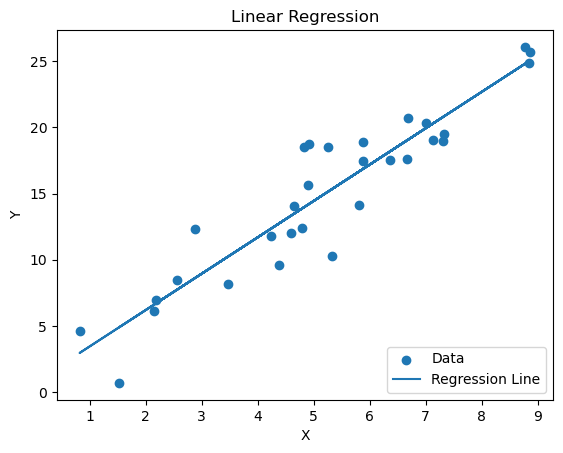

In [6]:
reg = slr(x,y) # Run the regression

plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Linear Regression')
plt.show()

# Example: Car Prices

## Case Study: Car Prices
- Before we unpack how linear models are optimized, let's use a fitted model to make some predictions: How does car age predict price?

In [7]:
df = pd.read_csv('./data/USA_cars_datasets.csv') # Load the data
df0 = df # Let's keep the original data around for comparison purposes
df.head() # Glance at the data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


<Axes: >

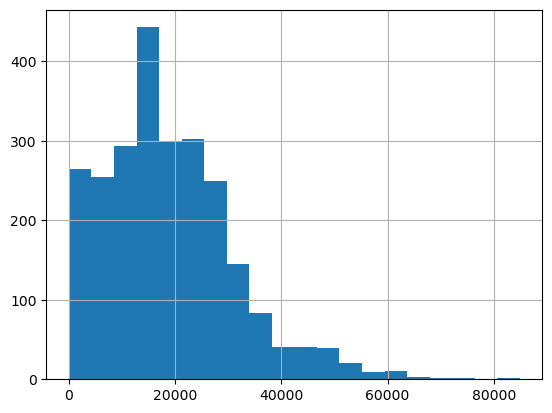

In [8]:
df['price'].hist(bins=20) 

<Axes: >

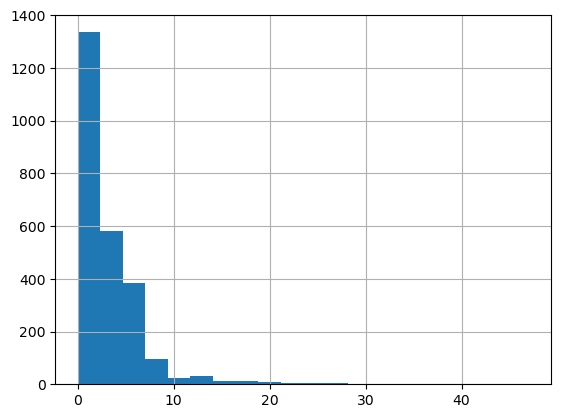

In [9]:
df['age'] = max(df['year'])-df['year'] # Convert year to age
df['age'].hist(bins=20)

<Axes: xlabel='age', ylabel='price'>

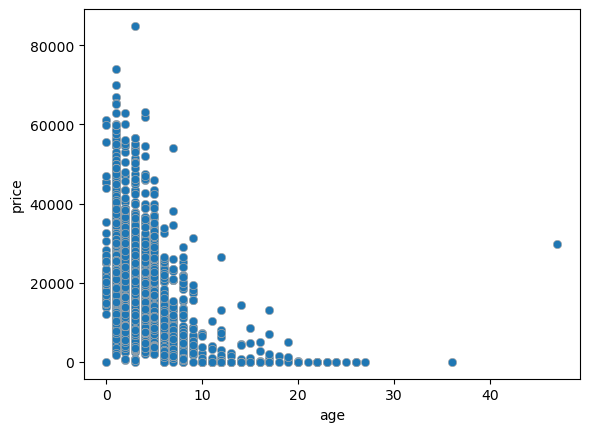

In [10]:
sns.scatterplot(data=df,y='price',x='age',edgecolor='darkgrey') # We've got some outliers here

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

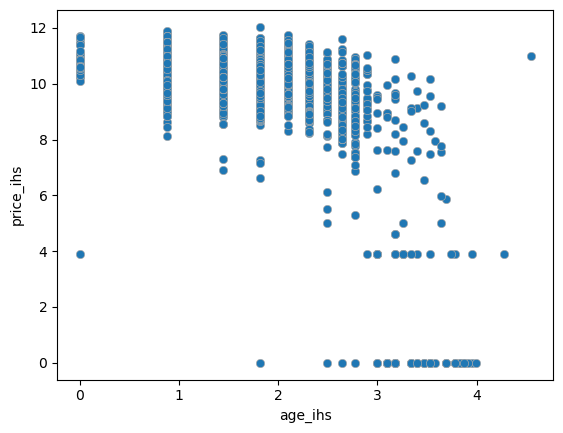

In [11]:
# Take arcsinh transformation to rescale the variables
df['price_ihs'] = np.arcsinh(df['price'])
df['age_ihs'] = np.arcsinh(df['age'])
sns.scatterplot(data=df,y='price_ihs',x='age_ihs',edgecolor='darkgrey') # We've got some outliers here

<Axes: >

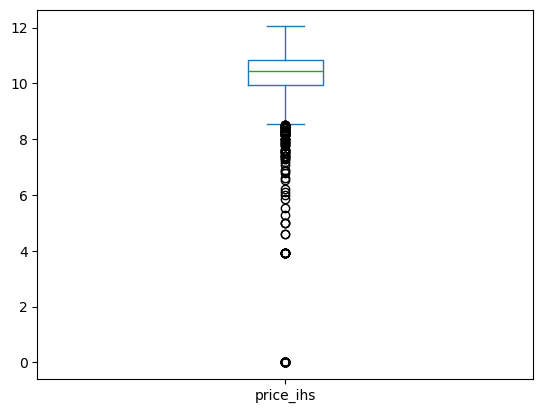

In [12]:
df['price_ihs'].plot.box() # Outliers below 9

<Axes: >

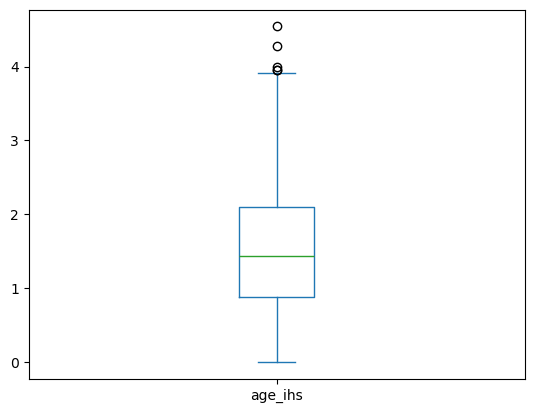

In [13]:
df['age_ihs'].plot.box() # Outliers above 4

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

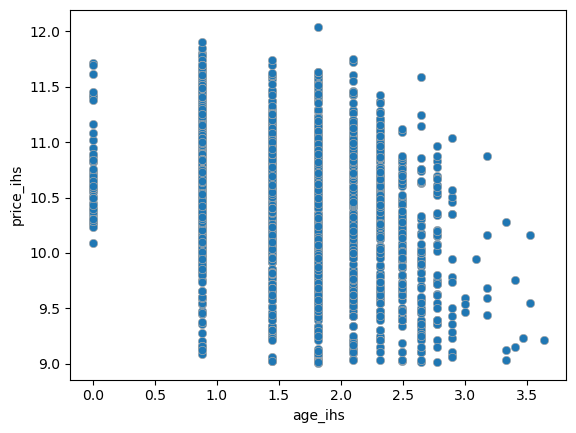

In [14]:
# Drop outliers:
df = df.loc[df['price_ihs']>9,:]
df = df.loc[df['age_ihs']<4,:]

sns.scatterplot(data=df,y='price_ihs',x='age_ihs',edgecolor='darkgrey')

In [15]:
x = df['age_ihs'] # Feature/Covariate
y = df['price_ihs'] # Target/Outcome
reg = slr(x,y) # Run the regression

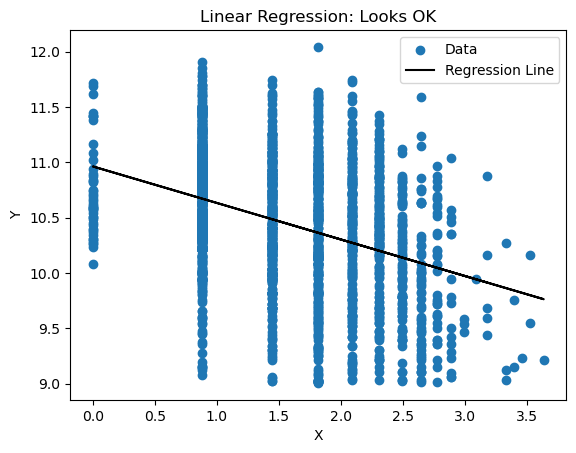

In [16]:
plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.title('Linear Regression: Looks OK')
plt.show()

In [17]:
df.sort_values('age',inplace=True) # Sorts the data by age of car

x = df['age']
y = df['price']
reg = slr( df['age_ihs'], df['price_ihs'])
y_hat_inv = np.sinh(reg['y_hat']) # sinh is the inverse of arcsinh


Text(0.5, 1.0, 'Linear Regression: Original Units')

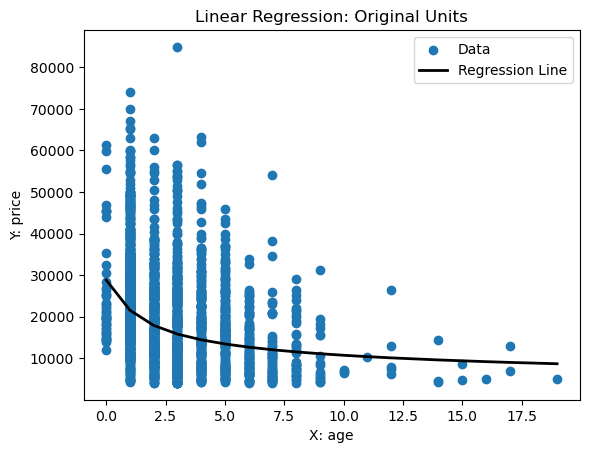

In [18]:
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat_inv,label='Regression Line',linewidth=2,color='black')
plt.xlabel("X: age")
plt.ylabel("Y: price")
plt.legend(loc='upper right')
plt.title('Linear Regression: Original Units')

In [19]:
# Why bother with all that data cleaning?
x = df0['age']
y = df0['price']

reg = slr(x,y)


Text(0.5, 1.0, 'Linear Regression: Looks Bad')

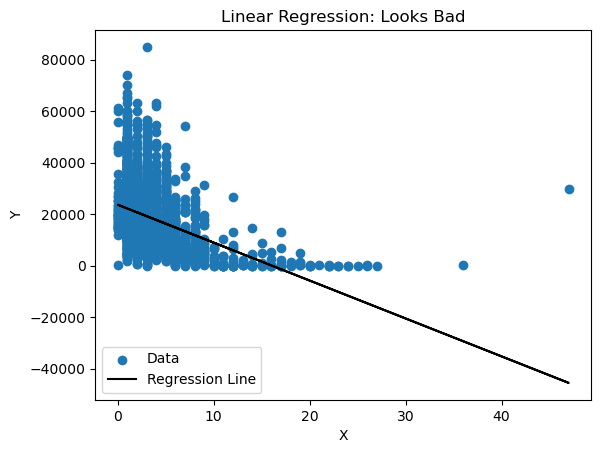

In [20]:
plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower left')
plt.title('Linear Regression: Looks Bad')

# Picking the Optimal Weights

## Errors/Residuals
- Fitting a linear model is based on minimizing the unexplained variation in the data
- Let $\hat{y}_i = x_i \cdot b$ be the prediction for observation $i$
- The *residual* or *error* for observation $i$ is
$$
e_i = y_i - \hat{y}_i = y_i - x_i \cdot b 
$$
This is how far off the in-sample prediction is, using the coefficients $b$ and variables $x_i$ for observation $i$ to make a prediction $\hat{y}_i$ --- how bad is our model at predicting values for data we already have?

## Sum-of-Squared-Error, `SSE`
- Some errors will generally be positive and some negative, but we want to count any error as undesirable, and larger errors as even worse failures. So, we square the error,
$$
e_i^2 = (y_i - \hat{y}_i)^2
$$
and sum over the observations,
$$
\text{SSE} = \sum_{i=1}^N e_i^2 = \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$
to get the **Sum of Squared Error**. 

## Mean Squared Error, Root-MSE
- The SSE is often normalized as an average, to get the **mean squared error**:
$$
\text{MSE} = \dfrac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2,
$$
- Taking the square root puts the quantity back into the original units, giving the **root mean square error**:
$$
\text{RMSE} = \sqrt{ \dfrac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}.
$$
- From a stats perspective there are subtle differences, but from a model-fitting perspective, these are all fundamentally the same thing: A metric of model performance based on squared error

In [21]:
import numpy as np
# The sum of the squares of the red lines is the SSE:
np.random.seed(500) # Set the seed for the random number generator
N = 30
x = 5 + 2*np.random.normal(0,1,size = N) # Create an x
eps = np.random.normal(0,3,size = N) # Create noise
b0 = -1 # Intercept coefficoent
b1 = 3 # Slope coefficient
y = b0 + b1*x + eps
reg = slr(x,y) # Run the regression

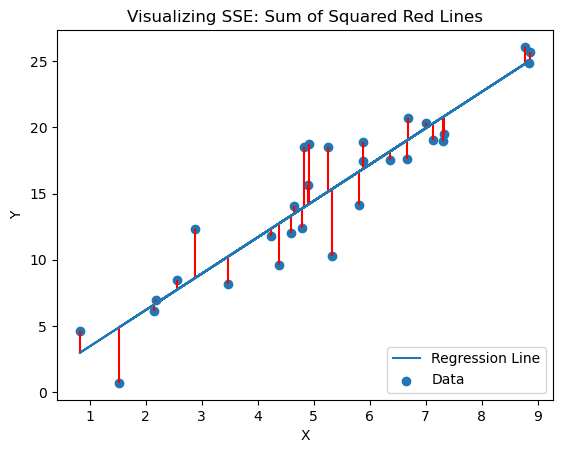

In [22]:
for i in range(len(x)):
    plt.vlines(x[i], y[i], reg['y_hat'][i], color='r') # Visualize residuals
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.scatter(x,y,label='Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Visualizing SSE: Sum of Squared Red Lines')
plt.show()

## Other Model Metrics
- There is no reason you can't target other measures of model performance, like **mean absolute deviation** which is more robust to outliers,
$$ \text{MAD} = \dfrac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|$$
or **worst absolute deviation** where worst-case prediction is the concern,
$$ \text{WAD} = \max_i |y_i - \hat{y}_i|$$
- There are (at least) hundreds of different metrics of model success besides `SSE`
- Why `SSE`? It has good properties from a statistical perspective and it's easier to do calculus with $e^2$ than $|e|$ or $(|e|^p)^{1/p}$

## Coefficient of Determination, $R^2$
- There is a common statistic used to summarize how predictive the model is of $y$, called the *coefficient of determination* or $R^2$:
$$
R^2 = 1 - \dfrac{\sum_{i=1}^N (y_i - x_i \cdot \hat{b})^2}{\sum_{i=1}^N(y_i-\bar{y})^2}
$$
- That numerator is the `SSE`, evaluated at $\hat{b}$: How much error remains after trying to explain it using your model?
- That denominator is the `SSE` of predicting $y_i$ with just the training mean as the predictor, $\bar{y}$
- So the ratio is the reduction in the `SSE` by using the explanatory variables rather than just the training mean
- This is a nice way to evaluate the model, since it is dimensionless and typically takes values between 0 and 1 (on the training set, it must be between 0 and 1; on a test set, you might get a negative $R^2$)

## Minimizing the `SSE`
- The goal of *linear regression* is to pick $b$ to make $\text{SSE}(b)$ as small as possible. 
- Let's do this for a *single linear model* with a constant and one explanatory/feature variable $x_i$:
$$
y_i = b_0 \times 1 + b_1 \times x_i
$$
- Then the `SSE` is:
$$
\text{SSE}(b_0, b_1) = \sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$


## Optimization
- To do interesting things in quantitative subjects, you typically need the mathematical background to maximize or minimize things like $\text{SSE}$ with respect to $b_0$ and $b_1$
- Roughly, to minimize a function $f(b)$, you take the derivative with respect to $b$, $f'(b)$, set it equal to zero, and solve for $b^*$ --- this is called a *first order (necessary) condition*

## First-Order Conditions for Optimization
- If $\text{SSE}(b_0,b_1) = \sum_{i=1}^N(y_i-b_0 - b_1x_i)^2$, the necessary condition for $b_0$ is
$$
\sum_{i=1}^N-2(y_i-b_0-b_1 x_i) = 0
$$
and the necessary condition for $b_1$ is
$$
\sum_{i=1}^N -2(y_i - b_0 - b_1 x_i)x_i = 0
$$
- How do we simplify these?
- Define $\bar{x}$ as the mean of $x$,
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
and similarly for $\bar{y}$

## The First Condition
- We can simplify the first condition for $b_0$ as:
\begin{alignat*}{2}
0 &=& \sum_{i=1}^N(y_i-b_0-b_1 x_i) \\
&=&  \sum_{i=1}^N y_i- \sum_{i=1}^N b_0-b_1 \sum_{i=1}^N x_i  \quad (\text{Distribute summation})\\
&=& \sum_{i=1}^N y_i- N b_0-b_1 \sum_{i=1}^N x_i \quad (\text{Sum $b_0$ $N$ times})\\
&=& \dfrac{\sum_{i=1}^N y_i}{N} -  b_0-b_1 \dfrac{\sum_{i=1}^N x_i}{N} \quad (\text{Divide by $N$})\\
0 &=& \bar{y} - b_0 - b_1 \bar{x} \quad (\text{Use definitions})
\end{alignat*}
implying $b_0^* = \bar{y} - b_1^* \bar{x}$.


## The Second Condition
- For the second condition for $b_1$:
\begin{alignat*}{2}
0 &=& \sum_{i=1}^N (y_i - b_0 - b_1 x_i)x_i \\
&=& \sum_{i=1}^N (y_i - (\bar{y} - b_1 \bar{x}) - b_1 x_i)x_i \quad (\text{Substitute in $b_0^*$})\\
&=& \sum_{i=1}^N y_i x_i - \bar{y} x_i - b_1 x_i^2 + b_1 \bar{x} x_i \quad (\text{Distribute $x_i$})\\
&=& \sum_{i=1}^N y_i x_i - \bar{y} \sum_{i=1}^N x_i - b_1 \sum_{i=1}^N x_i^2 + b_1 \bar{x} \sum_{i=1}^Nx_i \quad (\text{Distribute summation})\\
&=& \frac{1}{N} \sum_{i=1}^N y_i x_i -  \bar{y} \bar{x} - b_1 \frac{1}{N}\sum_{i=1}^N x_i^2 + b_1  \bar{x}^2 \quad \text{(Divide by $N$})\\
\end{alignat*}
implying
$$
b_1^* = \dfrac{\frac{1}{N} \sum_{i=1}^N y_i x_i -  \bar{y} \bar{x}}{\frac{1}{N}\sum_{i=1}^N x_i^2 -  \bar{x}^2}.
$$
This is also equal to 
$$
b_1^* = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})(y_i-\bar{y})}{\frac{1}{N}\sum_{i=1}^N (x_i-\bar{x})^2 },
$$
which is the sample covariance of $X$ and $Y$ divided by the sample variance of $X$.

## Single Linear Regression 
- Notice that the first condition can be written as
$$
0 = \sum_{i=1}^N (y_i - b_0 - b_1 x_i) 
  = \sum_{i=1}^N (y_i - \hat{y}_i)
 = \dfrac{1}{N} \sum_{i=1}^N e_i 
$$
so **the average error is equal to zero at the optimum**
- The second condition can be written as
$$
0 = \sum_{i=1}^N (y_i - b_0 - b_1 x_i)x_i 
= \sum_{i=1}^N (y_i - \hat{y}_i)x_i 
 = \sum_{i=1}^N e_i x_i 
 = e \cdot x 
$$
**The error term and explanatory variable are statistically uncorrelated, and at "right angles" to one another (orthogonal)**

## Single Linear Regression Function
- Here is an implementation of single linear regression, which returns a dictionary including the coefficients, the predicted values, and the residuals:

In [23]:
def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x) # Average of x's
    y_bar = np.mean(y) # Average of y's
    b1 = ((x-x_bar)@(y-y_bar))/((x-x_bar)@(x-x_bar)) # Slope coefficient
    b0 = y_bar - b1*x_bar # Intercept coefficient
    y_hat = b0 + b1*x   # Compute predictions
    residuals = y - y_hat   # Compute residuals
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

## Partialing Out, Projection
- The regression breaks $y$ into two pieces:
\begin{alignat*}{2}
y_i &=& (y_i - \hat{y}_i) + \hat{y}_i\\
&=& e_i + \hat{y}_i\\
\underbrace{y_i}_{\text{True value}} &=& \underbrace{e_i}_{\text{Error, residual}} + \underbrace{x_i \cdot b}_{\text{Model, prediction}}
\end{alignat*}
- But the residual from OLS averages to zero: It is uncorrelated with the prediction
- You can understand linear regression as removing the variation in $Y$ that can be explained by $X$ --- The residual contains all of the noise, the predictor $\hat{b} \cdot x$ contains all of the signal


In [24]:
np.random.seed(102) # Set the seed for the random number generator
N = 30

x = 5 + 2*np.random.normal(0,1,size = N) # Create an x
eps = np.random.normal(0,3,size = N) # Create noise
b0 = -1 # Intercept coefficoent
b1 = 3 # Slope coefficient
y = b0 + b1*x + eps


In [25]:
def slr(x,y): 
    """ Single Linear Regression Function. """
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x-x_bar)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

In [26]:
reg = slr(x,y) # Run the regression
print('Coefficients: ',reg['b0'],reg['b1'])

Coefficients:  -0.9442281734458042 3.1188748724251805


Text(0.5, 1.0, 'Linear Regression')

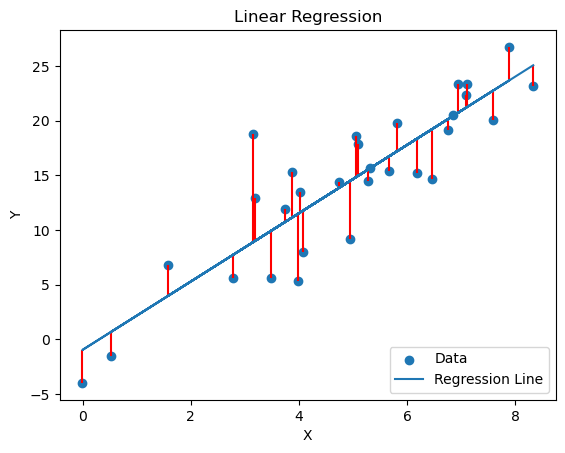

In [27]:
# Plot the results:
for i in range(len(x)):
    plt.vlines(x[i], y[i], reg['y_hat'][i], color='r') # Visualize residuals
plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Residuals: Noise')

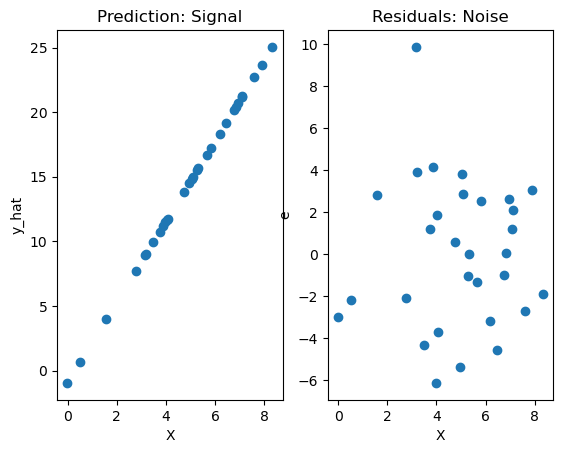

In [28]:
plt.subplot(1, 2, 1)
plt.scatter(x,reg['y_hat'])
plt.xlabel("X")
plt.ylabel("y_hat")
plt.title('Prediction: Signal')

plt.subplot(1, 2, 2)
plt.scatter(x,reg['residuals'])
plt.xlabel("X")
plt.ylabel("e")
plt.title('Residuals: Noise')

In [29]:
pd.DataFrame({'residuals':reg['residuals'],'x':x}).cov() # Compute correlation between e and x

,residuals,x
residuals,1.229162e+01,-4.075539e-15
x,-4.075539e-15,4.362118e+00


# Another SLR Example: Price vs. Mileage

<Axes: >

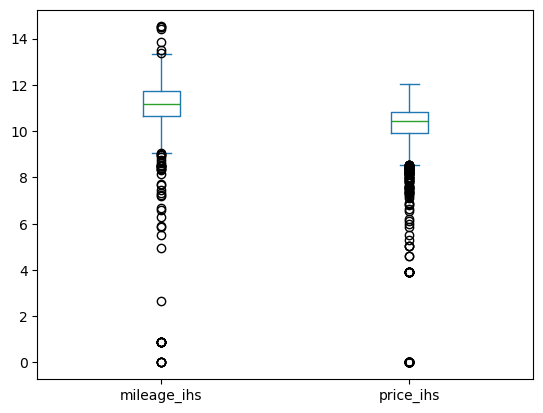

In [30]:
df = df0 # Let's start over
df['mileage'].describe()
df['mileage_ihs'] = np.arcsinh(df['mileage'])
df['price_ihs'] = np.arcsinh(df['price'])
df.loc[:,['mileage_ihs','price_ihs']].plot.box()

<Axes: xlabel='mileage_ihs', ylabel='price_ihs'>

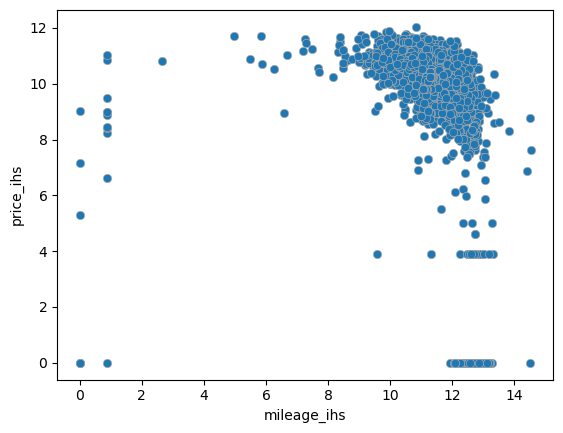

In [31]:
sns.scatterplot(data=df,y='price_ihs',x='mileage_ihs',edgecolor='darkgrey')

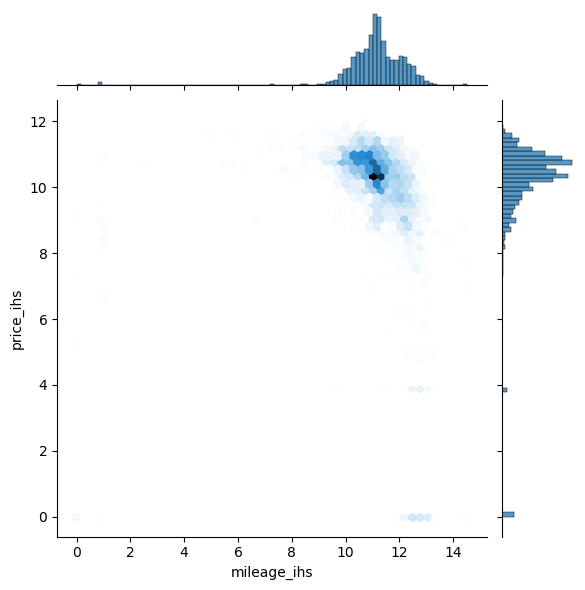

In [32]:
sns.jointplot(data=df,y='price_ihs',x='mileage_ihs',kind='hex')

In [33]:
# Drop outliers:
df = df.loc[df['mileage_ihs']>9,:] 
df = df.loc[df['mileage_ihs']<13,:]
df = df.loc[df['price_ihs']>9,:] 

<Axes: xlabel='price_ihs', ylabel='mileage_ihs'>

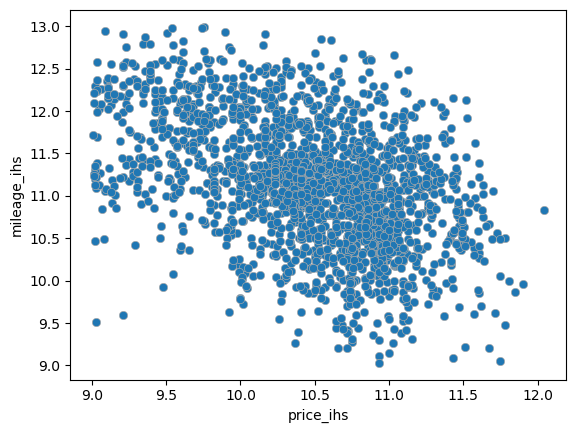

In [34]:
sns.scatterplot(data=df,x='price_ihs',y='mileage_ihs',edgecolor='darkgrey')

In [35]:
x = df['mileage_ihs']
y = df['price_ihs']
reg = slr(x,y) # Single Linear Regression
print('Intercept: ',reg['b0'], '\n', ' Slope: ', reg['b1']) 

Intercept:  14.458431674413575 
  Slope:  -0.35902388493185977


Text(0.5, 1.0, 'Linear Regression: Looks OK')

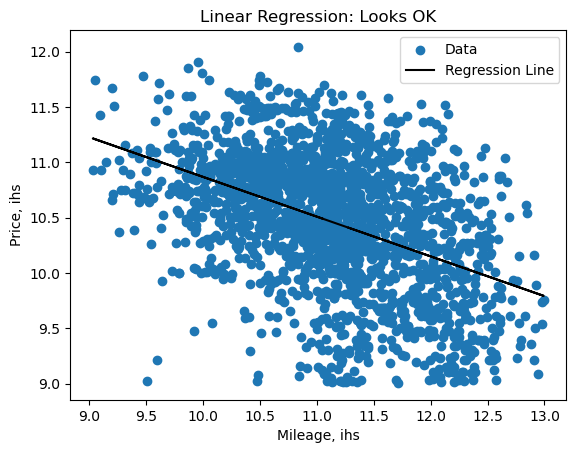

In [36]:
# Scatter plot of fit:
plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line',color='black')
plt.xlabel("Mileage, ihs")
plt.ylabel("Price, ihs")
plt.legend(loc='upper right')
plt.title('Linear Regression: Looks OK')

In [37]:
df.sort_values('mileage',inplace=True) # Sorts the data by mileage of car
x = df['mileage']
y = df['price']
reg = slr( df['mileage_ihs'], df['price_ihs'])
y_hat_inv = np.sinh(reg['y_hat']) # sinh is the inverse of arcsinh

Text(0.5, 1.0, 'Linear Regression: Original Units')

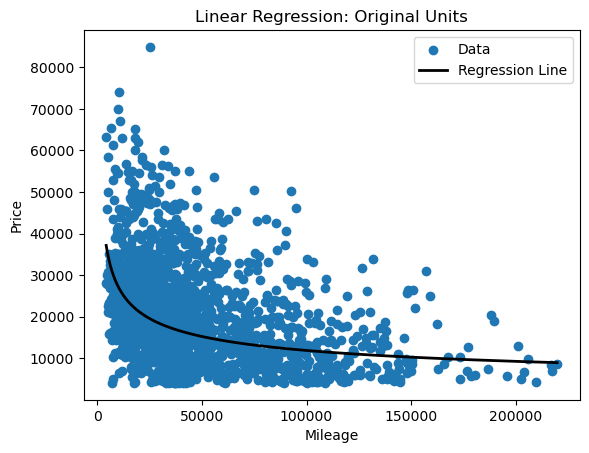

In [38]:
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat_inv,label='Regression Line',linewidth=2,color='black')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(loc='upper right')
plt.title('Linear Regression: Original Units')

In [39]:
# Without cleaning/feature engineering:
x = df0['mileage']
y = df0['price']
reg = slr(x,y)


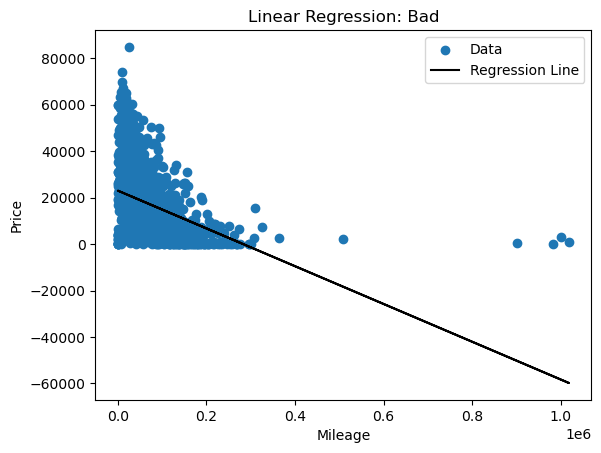

In [40]:
plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line',color='black')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(loc='upper right')
plt.title('Linear Regression: Bad')
plt.show()

# Multiple Linear Regression

## Multiple Linear Regression
- The previous discussion is great: we have some geometric intuition about how linear regression works, its mathematical foundation, and its key properties
- Problem: It's only worked out for one regressor/feature/explanatory variable
- How do we extend this to multiple variables? i.e., the model
$$ y = \underbrace{b_0}_{\text{Intercept}} \times 1 + b_1 \times  x_1 + b_2 \times x_2 + ... + b_L \times x_L $$
- We adjust the `SSE` to include all the variables of interest:
$$ SSE = \sum_{i=1}^N (y_i - b_0 - b_1 x_{i1} - b_2 x_{i2} - ... - b_L x_{iL} )^2 = \sum_{i=1}^N (y_i - x_i \cdot b)^2$$
and minimize over $b = (b_0, b_1, ..., b_L)$.

## Multiple Linear Regression Example
- Previously we looked at `age` and `mileage` separately as predictors of price
- Now that we have MLR, we can combine then into a single model
$$ \text{price} = b_0 + b_{1} \times \text{age} + b_{2}\times\text{mileage}  $$

In [41]:
# One-step multilinear regression:
def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

df['(Intercept)'] = 1
X = df.loc[:,['(Intercept)','age_ihs','mileage_ihs'] ]
y = df['price_ihs']
reg = mlr(X,y)
print('MLR coefficients: ', reg['b']) # Same values!

MLR coefficients:  [13.92816111 -0.10235897 -0.29755968]


## How does MLR "work"?
- This is the deep idea in regression
- Consider the variable $x_k$ whose coefficient you want to compute:
    1. Remove the effect of other variables
        - Regress $y$ on all variables *except* $x_k$. Save the residuals $r_y$.
        - Regress $x_k$ on the other variables. Save the residuals $r_{x_k}$.
        - These residuals represent the “pure” parts of $y$ and $x_k$ that cannot be explained by the other variables.
    2. Regress residuals
        - Regress $r_y$ on $r_{x_k}$. The slope is exactly the same as $b_k$ in the full MLR.
        - Linear regression "partials out" all of the variation in $y$ that can be explained by the other features
        - The optimal weight $b_k$ reflects only the remaining variation in $y$ that can be explained by $x_k$ alone:
$$ 
b_k = \dfrac{ \text{cov}(r_y, r_{x_k})}{\sigma^2_{r_{x_k}}}
$$  
- We will return to this idea a lot to explain phenomena related to linear models

In [42]:
# Let's do all the steps laboriously:

# Pick variables for analysis:
y = df['price_ihs']
x1 = df['mileage_ihs']
x2 = df['age_ihs']

reg1_y = slr(x1,y) # Regress y on x1
reg1_2 = slr(x1,x2) # Regress x2 on x1
y_temp = reg1_y['residuals'] # Extract the residual for y
x2_temp = reg1_2['residuals'] # Extract the residual for x2
reg_y_x2 = slr(x2_temp,y_temp) # Regress residuals on each other
print('Age coefficient: ', reg_y_x2['b1'])

reg2_y = slr(x2,y) # Regress y on x2
reg2_1 = slr(x2,x1) # Regress x1 on x2
y_resid = reg2_y['residuals'] # Extract the residual for y
x1_resid = reg2_1['residuals'] # Extract the residual for x1
reg_y_x1 = slr(x1_resid,y_resid) # Regress residuals on each other
print('Mileage coefficient: ', reg_y_x1['b1'])

# Compute intercept:
b0 = np.mean(y) - reg_y_x1['b1'] * np.mean(x1) - reg_y_x2['b1']*np.mean(x2)
print('Intercept: ', b0, '\n')

Age coefficient:  -0.10235896510249796
Mileage coefficient:  -0.2975596790112092
Intercept:  13.928161108815134 



## Multiple Linear Regression 
- Once you have multiple linear regression, you can build much more complex models of phenomena
- We probably want to include $\text{age}^2$ and $\text{mileage}^2$ to control for non-linear aging effects:
$$ \text{price} = b_0 + b_{1} \times \text{age} + b_{2} \times\text{age}^2 + b_{3}\times\text{mileage} + b_{4}\times\text{mileage}^2 $$
- This gives a highly flexible and extensible way of modeling how features predict a target variable; you can only unlock the power of linear regression if you are willing to give it a large feature space to work with
- Eventually, we want to discipline this process by using data, not just making up models that run the risk of overfitting our data

In [43]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,age,price_ihs,age_ihs,mileage_ihs,(Intercept)
2002,2002,27995,ford,doors,2018,clean vehicle,4181,gray,1fa6p8cf9j5120362,167654228,pennsylvania,usa,11 days left,2,10.932928,1.443635,9.031453,1
667,667,63200,chevrolet,corvette,2016,clean vehicle,4266,red,1g1ys2d6xg5609979,167783470,california,usa,2 days left,4,11.747207,2.094713,9.051579,1
646,646,46000,chevrolet,corvette,2016,clean vehicle,4445,black,1g1yj2d70g5122320,167780138,illinois,usa,2 days left,4,11.429544,2.094713,9.092682,1
2000,2000,27990,ford,doors,2018,clean vehicle,4512,ingot silver metallic,1fa6p8cf0j5159227,167654227,new york,usa,11 days left,2,10.932750,1.443635,9.107643,1
2004,2004,29988,ford,doors,2018,clean vehicle,4712,ingot silver metallic,1fa6p8cf5j5125462,167654229,pennsylvania,usa,11 days left,2,11.001700,1.443635,9.151015,1


In [44]:
y = df['price_ihs']
df['mileage_ihs_sq'] = df['mileage_ihs']**2
df['age_ihs_sq'] = df['age_ihs']**2
df['(Intercept)'] = 1
vars = ['(Intercept)','mileage_ihs','mileage_ihs_sq','age_ihs','age_ihs_sq']
X = df.loc[:,vars]
X.head()

,(Intercept),mileage_ihs,mileage_ihs_sq,age_ihs,age_ihs_sq
2002,1,9.031453,81.567142,1.443635,2.084083
667,1,9.051579,81.931084,2.094713,4.387821
646,1,9.092682,82.676872,2.094713,4.387821
2000,1,9.107643,82.949161,1.443635,2.084083
2004,1,9.151015,83.741074,1.443635,2.084083


[ 8.88250031e+00  6.17578937e-01 -4.16613623e-02 -6.20084626e-02
 -6.82521387e-03]
0.2101529960790638


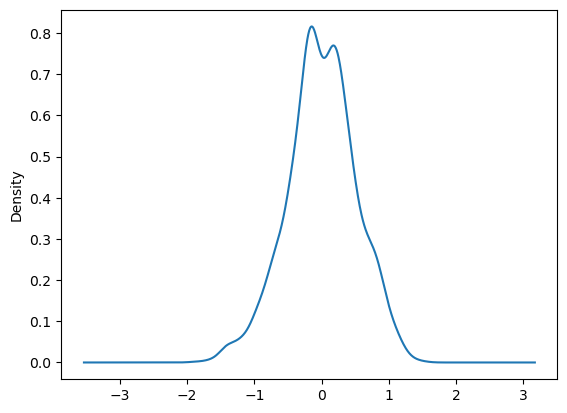

In [45]:
reg = mlr(X,y) # Run multiple linear regression
print(reg['b']) # Print coefficients 
reg['residuals'].plot.kde() # Plot residuals
print(reg['rsq']) # R-squared measure of model fit

# Regression with Sci-Kit

## The `sklearn.linear_model` Module
- Scikit-Learn has a linear regression object that can be used out-of-the box:
    - `from sklearn.linear_model import LinearRegression` to load the linear regression module
    - `myRegression = LinearRegression().fit(X, y)` fits 
- You'll see below that the results very similar to the `mlr` function above: They're using the same NumPy code "under the hood" to solve for the OLS coefficients, but with some additional feature engineering/normalization

In [46]:
from sklearn.linear_model import LinearRegression # Import linear regression model

y = df['price_ihs'] # Target variable

vars = ['mileage_ihs','mileage_ihs_sq',
        'age_ihs','age_ihs_sq',] # Features

X = df.loc[:,vars] # Construct data matrix
X.head() # Peek at data

,mileage_ihs,mileage_ihs_sq,age_ihs,age_ihs_sq
2002,9.031453,81.567142,1.443635,2.084083
667,9.051579,81.931084,2.094713,4.387821
646,9.092682,82.676872,2.094713,4.387821
2000,9.107643,82.949161,1.443635,2.084083
2004,9.151015,83.741074,1.443635,2.084083


In [47]:
reg = LinearRegression().fit(X, y) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure

8.88250031030253
[ 0.61757894 -0.04166136 -0.06200846 -0.00682521]
0.21015299607906412


# Expanding the Feature Space

## Beyond Fitting the Model
- Up to here, the discussion has been a standard analysis of linear models
- From the perspective of data science, we have **model specification** questions: What variables should go in the model?
- The power of linear models is that you can interact variables and expand the feature space, allowing you to better control how relationships between variables are modelled
- The risk is that your model turns to mush (multicolinearity)

## Model Selection
- To fully leverage the power of regression, you have many options to expand the range of variables that the model can use to explain the variation in the data:
    - An **interaction term** is when you take two explanatory variables, say $x_1$ and $x_2$, and multiply them together to get a new explanatory variable, $z = x_1 x_2$, like $\text{mileage} \times \text{age}$
    - A **polynomial family** is when you take an explanatory variable, say $x$, and compute its powers $x^2$, $x^3$, ... , $x^K$. (There are many kinds of families besides polynomial.)
    - A **logarithmic transformation** or **inverse hyperbolic sine transformation**
    - A **maxmin normalization** or **z-score normalization**
    - More advanced tools like **principal components analysis** decomposition of the data or **splines** that create highly transformations of variables
    - Any combination of the above
- This is where we run into a significant danger of overfitting: The more complex the feature space, the more opportunities we give the model to pick non-representative cases around which to build non-representative/externally invalid models
- You can do a lot of these by hand, using `df['new_var'] = transformation(df['old_var'])`, but many common and tedious transformations are already programmed in sklearn

## Quick Polynomial and Interaction Features/Variables
- It it tedious to compute interaction terms like $x_1 \times x_2$ or $x^2, x^3, ..., x^m$ on your own, and it's a very common task, so `sklearn` has a convenient tool for accomplishing this
- The `PolynomialFeatures` is the object in `sklearn.preprocessing` that can quickly create matrices of exponenetiated variables for you without doing it yourself
- The basic steps are:
    1. Import the object: `from sklearn.preprocessing import PolynomialFeatures`
    2. Decide the degree of the expansion and create an expander: `expander = PolynomialFeatures(degree=2,include_bias=False)`
    3. Execute the transformations: `Z = expander.fit_transform(X)` and get labels for the columns `names = expander.get_feature_names_out()`
    4. Create a new dataframe: `zdf = pd.DataFrame(data=Z, columns = names)`
    5. Possibly concatenate this new dataframe with other data
- Use this power wisely 

In [48]:
from sklearn.preprocessing import PolynomialFeatures
# Example dataframe:
df = pd.DataFrame({'apples':np.array([1,3,5]),'joules':np.array([3,-2,1]), 'stocks':np.array([-2,1,4])})
X = df
X.head()

,apples,joules,stocks
0,1,3,-2
1,3,-2,1
2,5,1,4


In [49]:
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,apples,joules,stocks,apples^2,apples joules,apples stocks,joules^2,joules stocks,stocks^2
0,1.0,3.0,-2.0,1.0,3.0,-2.0,9.0,-6.0,4.0
1,3.0,-2.0,1.0,9.0,-6.0,3.0,4.0,-2.0,1.0
2,5.0,1.0,4.0,25.0,5.0,20.0,1.0,4.0,16.0


In [50]:
## Compute all polynomials up to degree 3:
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,apples,joules,stocks,apples^2,apples joules,apples stocks,joules^2,joules stocks,stocks^2,apples^3,apples^2 joules,apples^2 stocks,apples joules^2,apples joules stocks,apples stocks^2,joules^3,joules^2 stocks,joules stocks^2,stocks^3
0,1.0,3.0,-2.0,1.0,3.0,-2.0,9.0,-6.0,4.0,1.0,3.0,-2.0,9.0,-6.0,4.0,27.0,-18.0,12.0,-8.0
1,3.0,-2.0,1.0,9.0,-6.0,3.0,4.0,-2.0,1.0,27.0,-18.0,9.0,12.0,-6.0,3.0,-8.0,4.0,-2.0,1.0
2,5.0,1.0,4.0,25.0,5.0,20.0,1.0,4.0,16.0,125.0,25.0,100.0,5.0,20.0,80.0,1.0,4.0,16.0,64.0


In [51]:
## Only compute the interactions up to degree 3:
expander = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,apples,joules,stocks,apples joules,apples stocks,joules stocks,apples joules stocks
0,1.0,3.0,-2.0,3.0,-2.0,-6.0,-6.0
1,3.0,-2.0,1.0,-6.0,3.0,-2.0,-6.0
2,5.0,1.0,4.0,5.0,20.0,4.0,20.0


## Quick One Hot Encoding
- We often have categorical data that need to be converted to numerical values for `sklearn` to work
- You can use Pandas to create dummy variables out of the categorical variable using `pd.get_dummies(varName)`
- You can use sklearn's `LabelBinarizer` from `.preprocessing` to create a matrix of one-hot encoded variables (the `OneHotEncoder` can be more complex to use)
- **We rarely put one-hot variables into the polynomial feature expander, unless it's a thing we've explicitly decided to do**

In [52]:
df = pd.DataFrame({'apples':np.array([1,3,5,7]),
                   'joules':np.array([3,-2,1,2]), 
                   'stocks':np.array([-2,1,4,6]),
                   'bird':['Cardinal','Oriole','Robin','Oriole']})
X = df
X.head()

,apples,joules,stocks,bird
0,1,3,-2,Cardinal
1,3,-2,1,Oriole
2,5,1,4,Robin
3,7,2,6,Oriole


In [53]:
# With Pandas:
ddf = pd.get_dummies(X['bird'])
ddf.head()

,Cardinal,Oriole,Robin
0,True,False,False
1,False,True,False
2,False,False,True
3,False,True,False


In [54]:
# With Pandas, if you don't like booleans:
ddf = pd.get_dummies(X['bird'],dtype='int')
ddf.head()

,Cardinal,Oriole,Robin
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0


In [55]:
# With sklearn:
from sklearn.preprocessing import LabelBinarizer

one_hot_encoder = LabelBinarizer()
oh = one_hot_encoder.fit_transform(X['bird']) # One-hot encode the 'bird' variable
print(oh)
names = one_hot_encoder.classes_ # Get names of the classes
print(names)

zdf = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
zdf.head()

[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]
['Cardinal' 'Oriole' 'Robin']


,Cardinal,Oriole,Robin
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0


## The Dummy Variable Trap
- When running linear regression with dummy variables, you have two choices:
    - For each dummy variable, use the `pd.get_dummies(..., drop_first=True)`, and keep the intercept in the regression
    - Drop the intercept of the regression with the option `LinearRegression(fit_intercept=False).fit(X, y)`, but keep all the dummies
- The reason this occurs is that if you have an intercept and all of the dummies, you can replicate one of your regressors from a combination of other ones. This is called **perfect multicolinearity**, and some of your coefficents won't be defined
- Most stats packages hide this in the background of the regression, but you have to handle it with pandas/sklearn more explicitly
- As long as you're not interpreting the coefficients, it doesn't matter what choice you make, you just have to make a choice

## Quickly Concatenating Dataframes
- OK, you made these nice shiny features, how do you get them back into a single dataframe?
- The `df = pd.concat([df1,df2,...,dfk],axis=1)` makes a new dataframe out of the columns of the original dataframes `df1`, `df2`, ..., `dfk`
- So you can build all the transformed data frames you want, then collapse them all back into one dataframe for processing
- Since you are going to do this, you might want to think carefully about how you're building the dataframe chunks, and use `.iloc` or `.loc` to be selective about what going into each one

In [56]:
## Polynomial features:
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(df.iloc[:,1:3]) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X1 = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

## Dummy variables:
X2 = pd.get_dummies(df['bird'], dtype=float) # Create dummies

## Concatenate:
X = pd.concat([X1,X2],axis=1) # Concatenate engineered features
X.head()

,joules,stocks,joules^2,joules stocks,stocks^2,Cardinal,Oriole,Robin
0,3.0,-2.0,9.0,-6.0,4.0,1.0,0.0,0.0
1,-2.0,1.0,4.0,-2.0,1.0,0.0,1.0,0.0
2,1.0,4.0,1.0,4.0,16.0,0.0,0.0,1.0
3,2.0,6.0,4.0,12.0,36.0,0.0,1.0,0.0


## Quickly Handling Outliers
- We have the sense that outliers are bad, particularly for global smoothers like linear regression
- We want to (1) detect outliers, (2) create an outlier dummy, and (3) **winsorize** them: Replace values outside the whiskers with the min/max values of the whiskers (when you remove outliers altogether, it is called **trimming**)
- This is, again, a quick way of processing outliers without losing data

<Axes: >

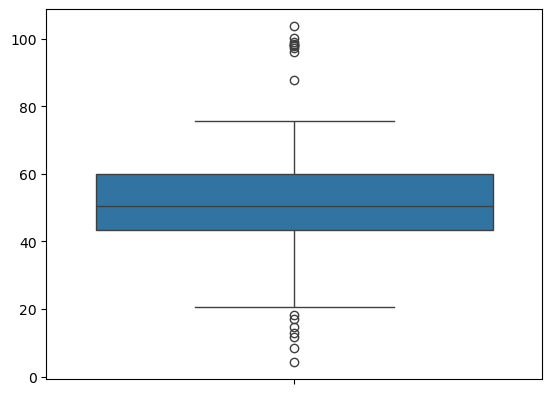

In [57]:
## Generate random data with outliers
np.random.seed(1000)
N = 200
switch = np.random.uniform(0,1,N)
x = (switch<.05)*np.random.normal(20,10,N)+(switch >= .05)*(switch<.95)*np.random.normal(50,10,N)+(switch>=.95)*np.random.normal(100,5,N)
sns.boxplot(x)

In [58]:
## Function to winsorize a variable:
def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Winsorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)


<Axes: >

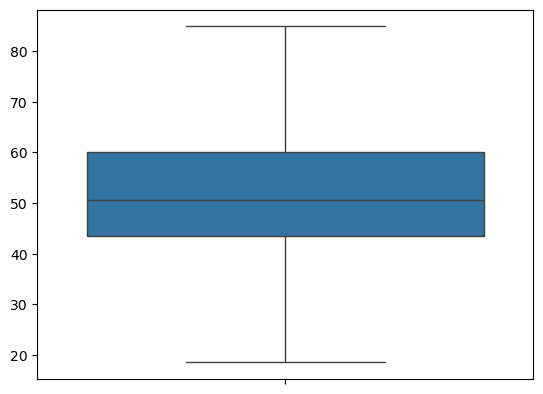

In [59]:
sns.boxplot( winsorize(x))

# Cars, Again
- Let's build some simple models to predict car prices with some feature engineering

In [60]:
df = df0 # Let's start over, again
df.head() # Glance at the data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,age,price_ihs,age_ihs,mileage_ihs
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,12,9.441452,3.179785,13.214457
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,9,8.665268,2.893444,12.850828
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,2,9.277999,1.443635,11.279479
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,6,10.819778,2.491780,11.762064
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,2,10.922335,1.443635,9.496121


In [61]:
## Simple regression on brand dummies:

# Target Variable
y = df['price']

# Brand Dummy:
print(df['brand'].unique())
X_d = pd.get_dummies(df['brand'],dtype='int') # Create brand dummies

# Regression:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_d, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_d, y)) # R squared measure
results

['toyota' 'ford' 'dodge' 'chevrolet' 'gmc' 'chrysler' 'kia' 'buick'
 'infiniti' 'mercedes-benz' 'jeep' 'bmw' 'cadillac' 'hyundai' 'mazda'
 'honda' 'heartland' 'jaguar' 'acura' 'harley-davidson' 'audi' 'lincoln'
 'lexus' 'nissan' 'land' 'maserati' 'peterbilt' 'ram']
R-squared:  0.12030739559992265


,variable,coefficient
0,acura,7266.666667
1,audi,13981.250000
2,bmw,26397.058824
3,buick,19715.769231
4,cadillac,24941.000000
5,chevrolet,18669.952862
6,chrysler,13686.111111
7,dodge,17781.988426
8,ford,21666.888259
9,gmc,10657.380952


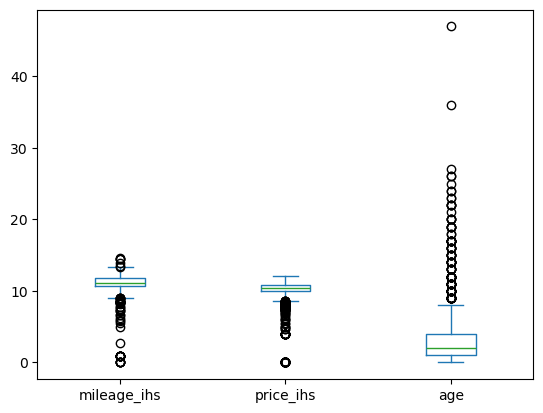

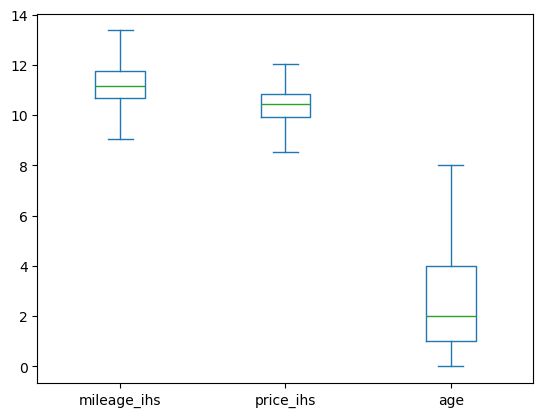

In [62]:
## More complex regression on brand and numeric values:

# Target Variable
y = df['price_ihs']

# Initial boxplot:
df.loc[:,['mileage_ihs','price_ihs','age']].plot.box()

# Winsorize using .apply:
df.loc[:, ['mileage_ihs','price_ihs','age'] ] = df.loc[:,['mileage_ihs','price_ihs','age'] ].apply(winsorize)

# Final boxplot:
df.loc[:,['mileage_ihs','price_ihs','age']].plot.box()

# Expand numeric variables:
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
X_num = df.loc[:,['mileage_ihs']]
Z = expander.fit_transform(X_num) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_num = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

# Concatenate
X = pd.concat( [X_num, X_d],axis=1)

In [63]:
X.head()

,mileage_ihs,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,13.214457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12.850828,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,11.279479,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11.762064,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9.496121,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results

R-squared:  0.39536091971260845


,variable,coefficient
0,mileage_ihs,-0.499900
1,acura,15.463345
2,audi,15.816689
3,bmw,16.094315
4,buick,15.946957
5,cadillac,16.213362
6,chevrolet,15.977385
7,chrysler,15.649452
8,dodge,15.856337
9,ford,16.036613


<Axes: xlabel='price_ihs', ylabel='Density'>

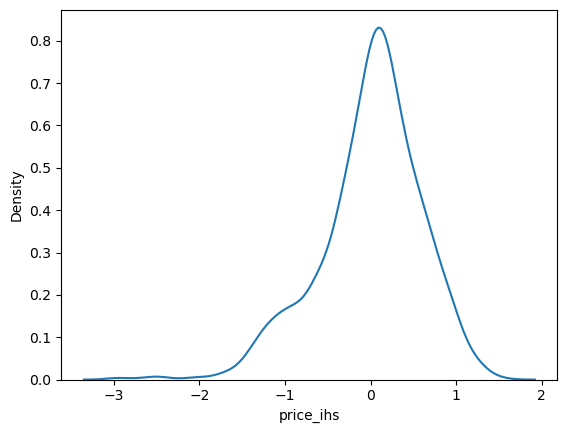

In [65]:
sns.kdeplot(df['price_ihs'] -reg.predict(X) ) # Residual plot

# Exploring Linearity

## What, exactly, makes a model linear?
- A model is linear because the coefficients, $b$, enter the prediction as
$$
\hat{y} = b \cdot \hat{x} = b_1 \hat{x}_1 + b_2 \hat{x}_2 + ... b_J \hat{x}_J
$$
so that the relationship between $\hat{y}$ and each $\hat{x}_j$ is a linear one through $b_j$
- Taking non-linear transformations of the $x_j$'s simply gives new variables, like $\log(x_j)$ or $x_j^2$ -- *Transformations of the regressors don't make the model nonlinear*
- Likewise, if there was a coefficient written in a funky nonlinear way, like $\sqrt{ \text{asinh}(b_j)}$, you can simply relabel that coefficient as $b_j \leftarrow \sqrt{ \text{asinh}(b_j)}$ and make the model linear again.
- There *are* many interesting non-linear models, but they are often derived from a domain-specific theory and require additional work to understand

## But is this Relationship Linear?
- If you remember, the covariance of $x^2+\varepsilon$ with $x$ on points randomly sampled from $[-1,1]$ was zero...
- If the relationship between $Y$ and $X$ isn't linear, we have solutions: Include powers or transformations of $X$
- How to determine if the relationship is linear in a complex, multivariate setting?
- A **partial correlation plot** between $y$ and $x_k$ is constructed as follows:
1. Regress $y$ on all the variables besides $x_k$, and save the residuals $r_y$
2. Regress $x_k$ on all the variables besides $x_k$, and save the residuals $r_x$
3. Plot $r_y$ against $r_x$
- Why does this work? This is the variation in $Y$ being explained by $x_k$ alone (Frisch-Waugh-Lovell Theorem, Two-Stage Least Squares), so we hope it's approximately linear
- This can be outrageously counter-intuitive, because of what's called **multi-colinearity**

In [66]:
from sklearn.linear_model import LinearRegression # Import linear regression model
df = df0 # Let's start over, again
df.loc[:, ['mileage_ihs','price_ihs','age_ihs'] ] = df.loc[:,['mileage_ihs','price_ihs','age_ihs'] ].apply(winsorize)
y = df['price_ihs'] # Target variable
df['mileage_ihs X age_ihs'] = df['mileage_ihs']*df['age_ihs'] # Interaction term
X_n = df.loc[:,['mileage_ihs','age_ihs', 'mileage_ihs X age_ihs']]
X = X_n
reg = LinearRegression(fit_intercept=True).fit(X, y) # Fit the linear model
print('Rsq: ', reg.score(X,y) )

Rsq:  0.37277230623231283


In [67]:
#'mileage_ihs', 'age_ihs', 'mileage_ihs X age_ihs'

var =  'mileage_ihs' #'mileage_ihs X age_ihs'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

Partial R^2:  0.9651446980981856


[Text(0.5, 1.0, 'Scatterplot of Residuals')]

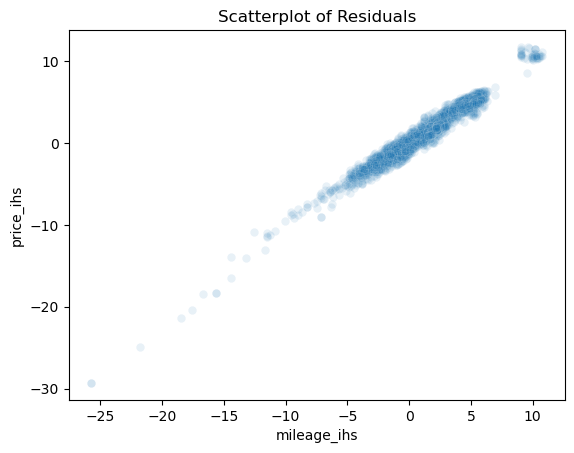

In [68]:
## 3. Plot r_y against r_k
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )
sns.scatterplot(y=r_y, x=r_x,alpha=.1).set(title='Scatterplot of Residuals')

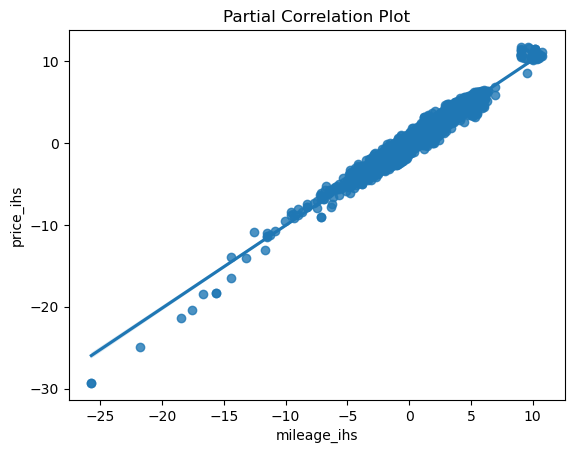

In [69]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

[Text(0.5, 1.0, 'Original Variables')]

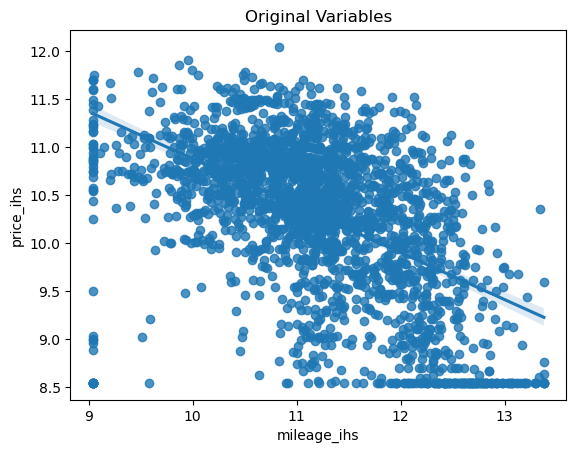

In [70]:
sns.regplot(y=df['price_ihs'], x=df[var]).set(title='Original Variables')

- Why does one plot slope up and the other down? Once you control for $\text{Age} \times \text{Mileage}$, the sign reverses for the relationship between price and mileage. This probably represents survivor bias of some sort: Older cars that are still on the market--once you control for age times mileage--are perhaps better built or higher quality in general (e.g. perhaps all of the older cars are BMWs and Volvos that have been well-maintained).

# Conclusion

## Model Selection
- Datasets often have dozens or thousands of variables, and we can create many more through transforming and interacting variables. Which variables go into a linear regression?
- In linear regression, our model is **underfit** if we use too few variables which cannot capture the complex relationships between the features and target variable, while our model is **overfit** if we are using too many variables which are exploiting too many unique features of the training data
- In statistics, it is an assumption that the analyst roughly knows the "true" data generating process, and properties of an estimator are derived under that assumption - statistics has few useful answers for how to pick the form of the model itself (e.g. Akaike Information Criterion, Bayesian Information Criterion, Mallows' $C_p$)
- In machine learning, we will learn some tools and techniques for model selection in a data-driven way later on in the course based on cross validation (e.g. LASSO)

## General Linear Models
- In many situations, there are additional restrictions on the environment that cannot always be satisfied by a linear model
    - The outcome/target variable might be a binary 0/1 outcome, so we are predicting the probability of something occuring. OLS might predict values less than zero or greater than one. Popular solutions are **Logit regression** or **Probit regression**
    - The outcome/target variable might be a non-negative integer, meaning that it is **count data**, like the number of earthquakes or cases of an illness. OLS won't predict counts. Popular solutions are **Poisson regression** or **negative binomial regression**.
- In these cases, we can estimate alternative models that impose restrictions on the outcome of the linear model, typically through maximum likelihood estimation or generalized linear modeling